In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys
import warnings
%matplotlib inline

In [9]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [10]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [11]:
data.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_wid

In [12]:
data.nunique

<bound method DataFrame.nunique of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_

In [13]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
x = data.iloc[:,0:20]
y = data.iloc[:,20]

In [16]:
test_data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [17]:
test_data.info

<bound method DataFrame.info of        id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35

In [19]:
test_data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [20]:
test_data.nunique

<bound method DataFrame.nunique of        id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1         

------------>Outlier Analysis of Non-Categorical Data<------------



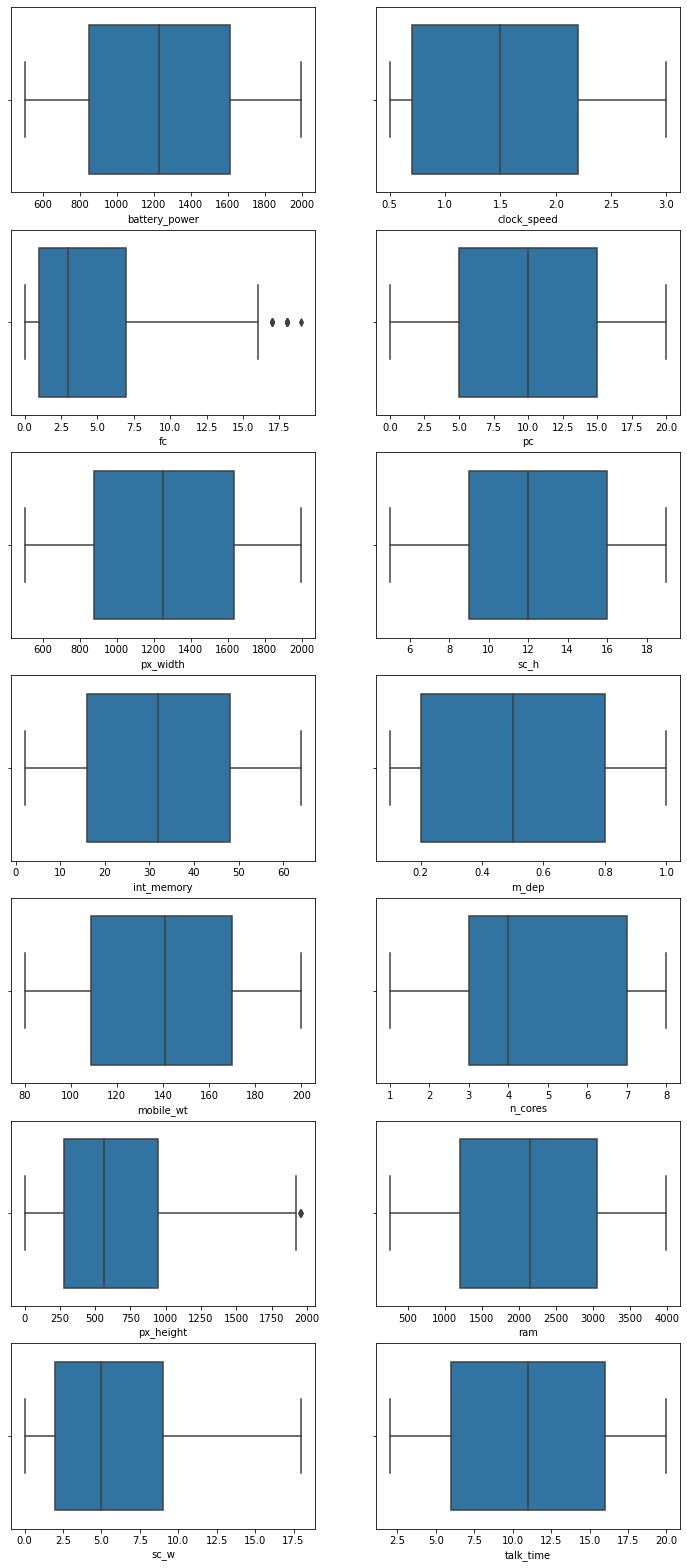

In [21]:
print("------------>Outlier Analysis of Non-Categorical Data<------------")
print()
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28))
sns.boxplot(x=data['battery_power'],ax=ax[0,0])
sns.boxplot(x=data['clock_speed'],ax=ax[0,1])
sns.boxplot(x=data['fc'],ax=ax[1,0])
sns.boxplot(x=data['pc'],ax=ax[1,1])
sns.boxplot(x=data['px_width'],ax=ax[2,0])
sns.boxplot(x=data['sc_h'],ax=ax[2,1])
sns.boxplot(x=data['int_memory'],ax=ax[3,0])
sns.boxplot(x=data['m_dep'],ax=ax[3,1])
sns.boxplot(x=data['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=data['n_cores'],ax=ax[4,1])
sns.boxplot(x=data['px_height'],ax=ax[5,0])
sns.boxplot(x=data['ram'],ax=ax[5,1])
sns.boxplot(x=data['sc_w'],ax=ax[6,0])
sns.boxplot(x=data['talk_time'],ax=ax[6,1])

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

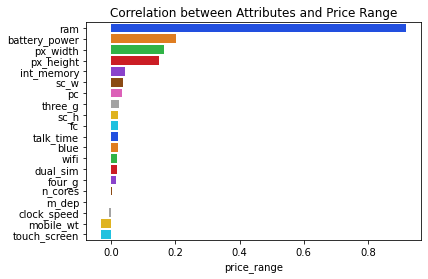

In [22]:
#we are not considering the correlations between X features among themselves
corr = data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

------------>Analysis of Attributes<------------



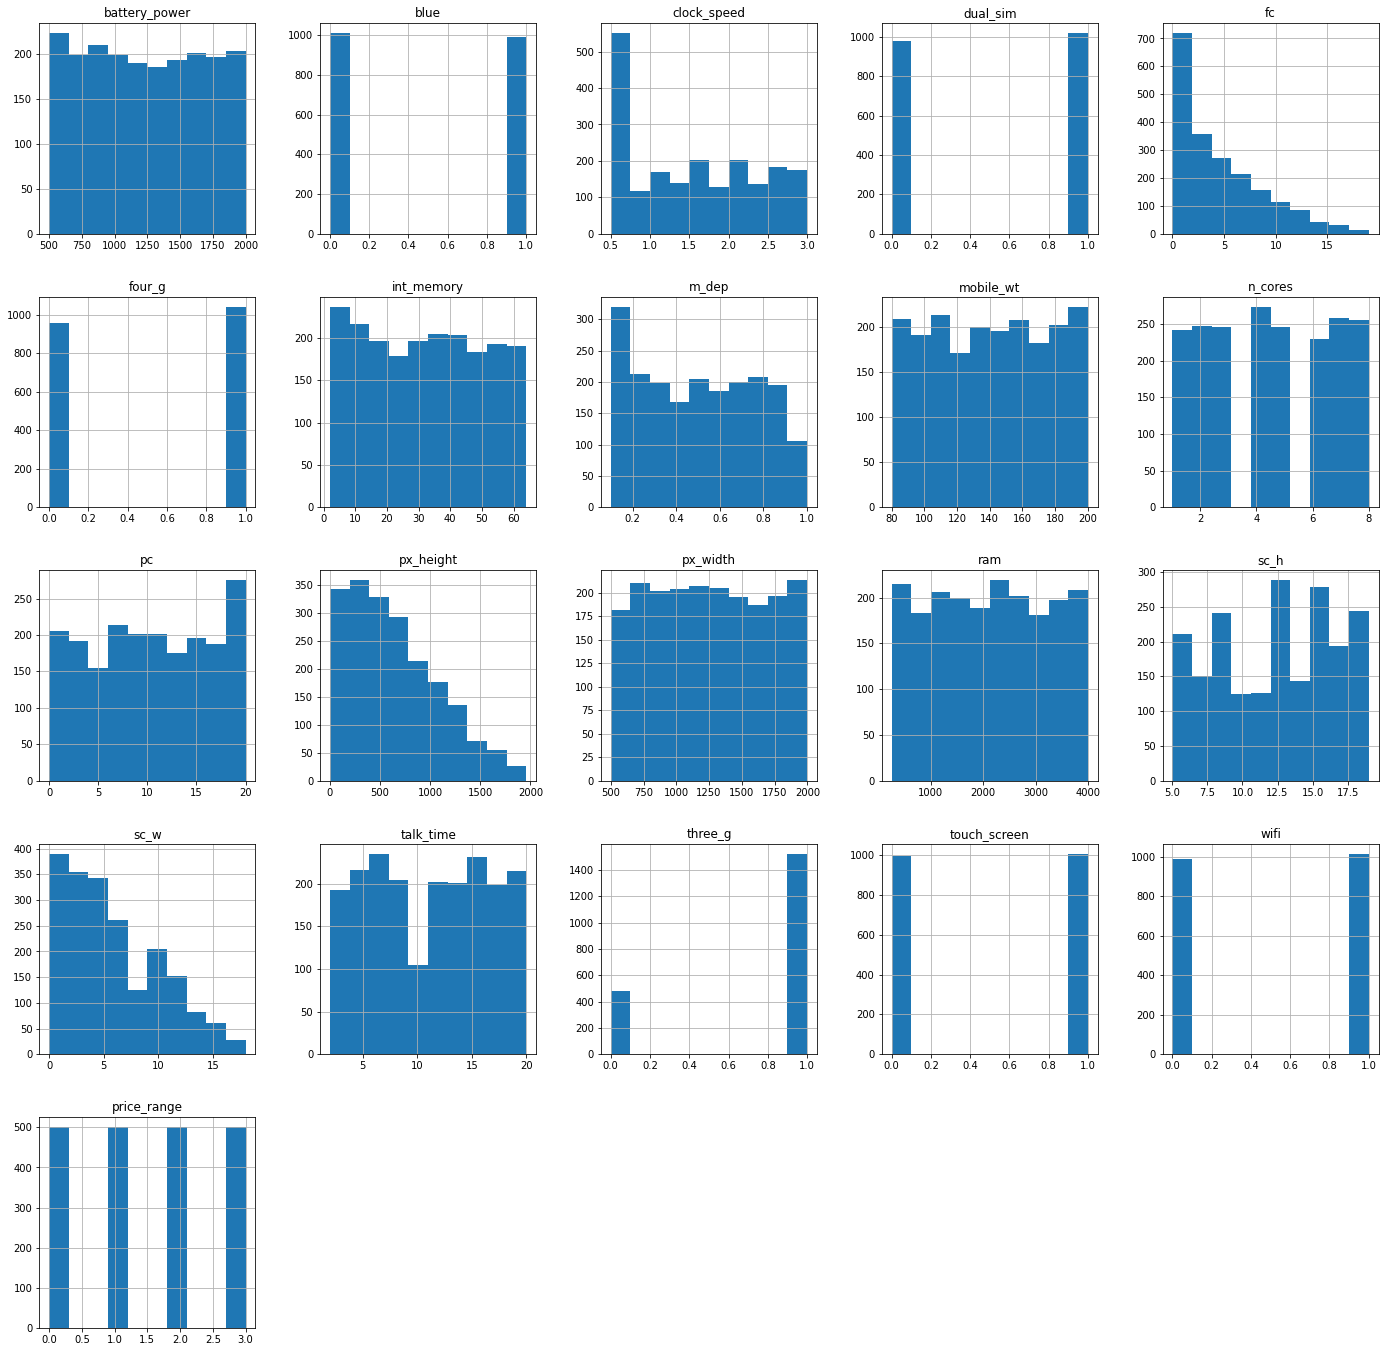

In [23]:
#data visualization drawing histogram
print("------------>Analysis of Attributes<------------")
print()
data.hist(sharex=False, sharey=False, figsize=(24,24) )
plt.show()

------->EDA for Best 8 Features for SVM<-------


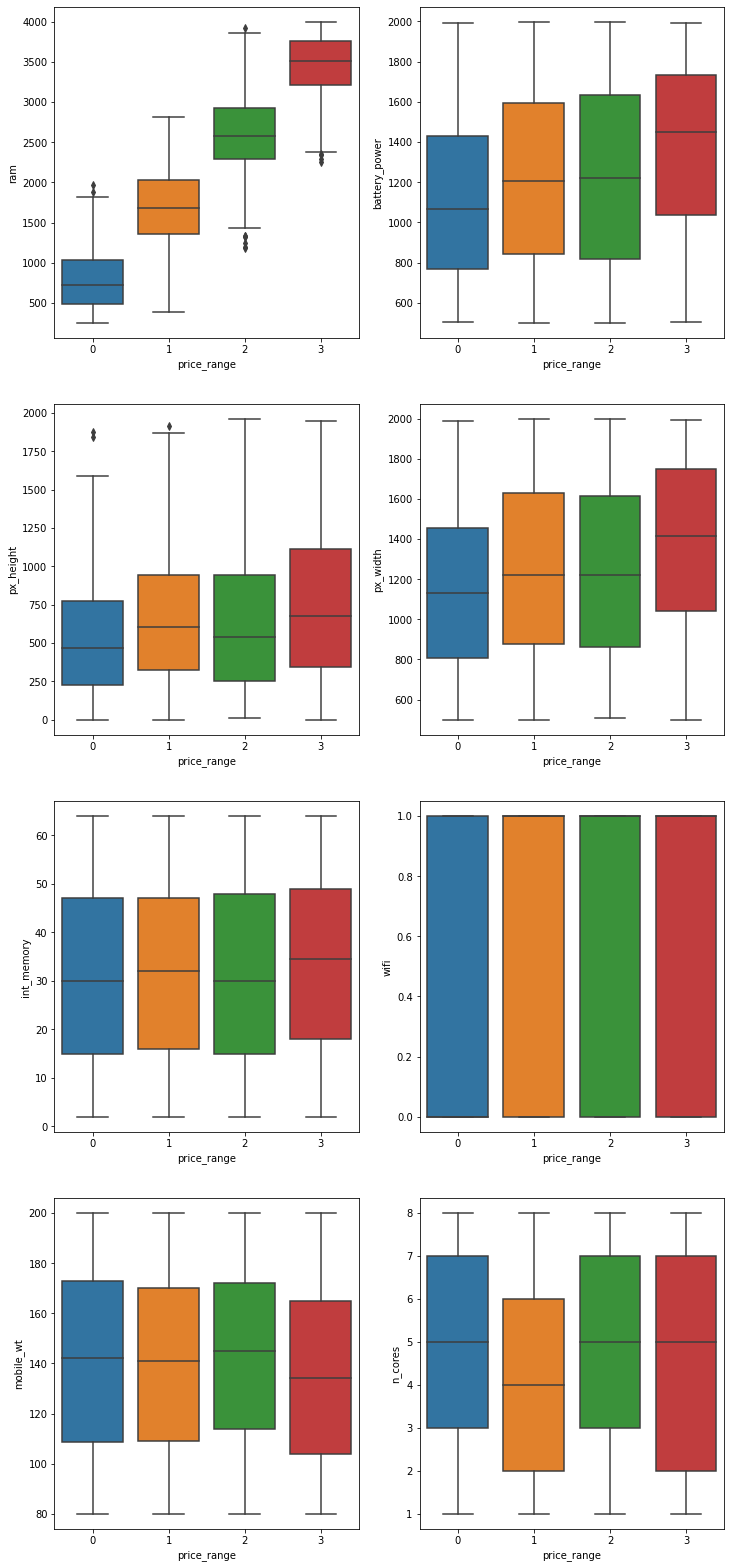

In [26]:
#EDA for the best 8 features that we saw on SVM
print("------->EDA for Best 8 Features for SVM<-------")
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12,28))
sns.boxplot(x='price_range',y='ram',data=data,ax=ax[0,0]);
sns.boxplot(x='price_range',y='battery_power',data=data,ax=ax[0,1]);
sns.boxplot(x='price_range',y='px_height',data=data,ax=ax[1,0]);
sns.boxplot(x='price_range',y='px_width',data=data,ax=ax[1,1]);
sns.boxplot(x='price_range',y='int_memory',data=data,ax=ax[2,0]);
sns.boxplot(x='price_range',y='wifi',data=data,ax=ax[2,1]);
sns.boxplot(x='price_range',y='mobile_wt',data=data,ax=ax[3,0]);
sns.boxplot(x='price_range',y='n_cores',data=data,ax=ax[3,1]);

In [27]:
#Splitting the training and testing dataset
from sklearn.model_selection import train_test_split
# Splitting of data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify = y)

In [28]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = data.iloc[:,:20].columns
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)

In [31]:
# Import Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_lr)
acc_lr = accuracy_score(y_valid, y_pred_lr)

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(random_state=101)
dtg.fit(x_train, y_train)
y_pred_dtg = dtg.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_dtg)
acc_dtg = accuracy_score(y_valid, y_pred_dtg)

In [51]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(criterion= "entropy",random_state=101)
dte.fit(x_train, y_train)
y_pred_dte = dte.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_dte)
#Calculate Accuracy
acc_dte = accuracy_score(y_valid, y_pred_dte)

In [44]:
# ------------->RANDOM FOREST<------------
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=0,criterion = 'entropy',oob_score = True) 
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_rf)
acc_rf = accuracy_score(y_valid, y_pred_rf)

In [45]:
# ------------->K NEAREST NEIGHBOR<-------------
from sklearn.neighbors import KNeighborsClassifier  
# Finding optimal KNN Grid Search Method
from sklearn.model_selection import GridSearchCV
# parameters = {'n_neighbors':np.arange(1,50)}
# knn = KNeighborsClassifier()
# model = GridSearchCV(knn, parameters, cv=5)
# model.fit(x_train, y_train)
# print(model.best_params_)
#Printing optimal n-neighbors
knn = KNeighborsClassifier(n_neighbors=45)  
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_knn)
#Calculate Accuracy
acc_knn = accuracy_score(y_valid, y_pred_knn)

In [46]:
#------------->SVM<-------------   
from sklearn.svm import SVC 
svm = SVC(kernel = 'linear',random_state = 0)  
svm.fit(x_train,y_train)                  
y_pred_svm = svm.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_svm)
#Calculate Accuracy
acc_svm = accuracy_score(y_valid, y_pred_svm)

In [54]:
#------------>Accuracy Comparison<------------
models = ['LR','DTG','DTE','RF','KNN','SVM']
acc_scores = [acc_lr,acc_dtg,acc_dte,acc_rf,acc_knn,acc_svm]
print("Models\tAccuracy\n")
for i in range(6):
    print(str(models[i]) + "\t" + str(acc_scores[i]),end='\n')

Models	Accuracy

LR	0.96
DTG	0.8175
DTE	0.835
RF	0.9125
KNN	0.6425
SVM	0.9625



------------>We decide from the Bar Graph that the best Model is SVM<------------


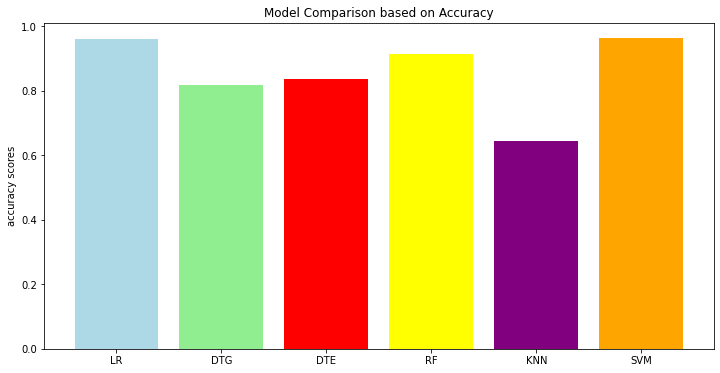

In [55]:
#------------>Finding the Best Algorithm<----------

print("\n------------>We decide from the Bar Graph that the best Model is SVM<------------")
plt.rcParams['figure.figsize'] = (12,6)
plt.bar(models, acc_scores, color=['lightblue', 'lightgreen','red','yellow','purple','orange'])
plt.ylabel("accuracy scores")
plt.title("Model Comparison based on Accuracy")
plt.show()